In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\tusha\\OneDrive\\Desktop\\BostonHouse\\boston_train.csv")

In [4]:
df = df.fillna('')

In [5]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
df=df.drop('ID', axis = 1)

In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


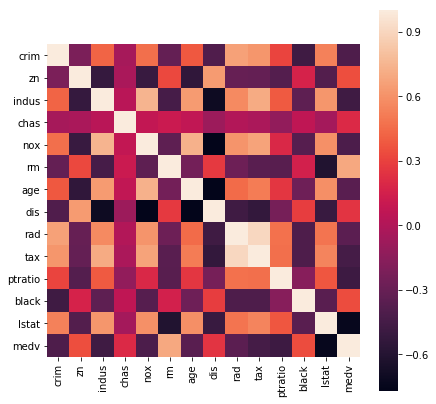

In [14]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), square=True)
plt.show()

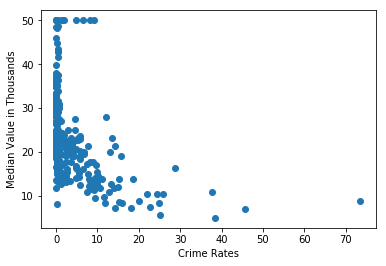

In [55]:
plt.scatter(df["crim"],df["medv"])
plt.xlabel("Crime Rates")
plt.ylabel("Median Value in Thousands")
plt.show()

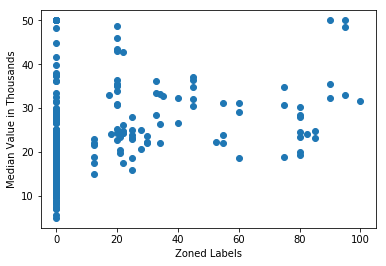

In [56]:
plt.scatter(df["zn"],df["medv"])
plt.xlabel("Zoned Labels")
plt.ylabel("Median Value in Thousands")
plt.show()

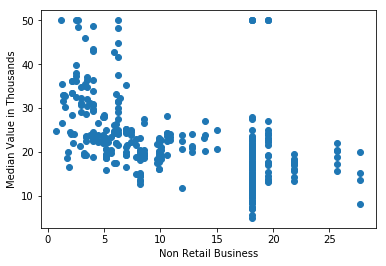

In [57]:
plt.scatter(df["indus"],df["medv"])
plt.xlabel("Non Retail Business")
plt.ylabel("Median Value in Thousands")
plt.show()

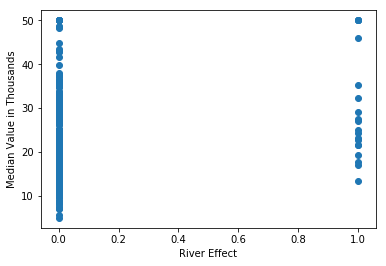

In [58]:
plt.scatter(df["chas"],df["medv"])
plt.xlabel("River Effect")
plt.ylabel("Median Value in Thousands")
plt.show()

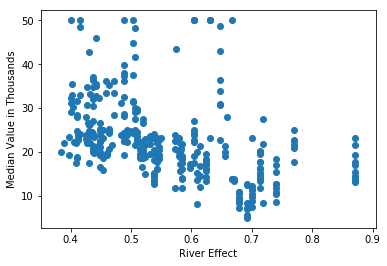

In [59]:
plt.scatter(df["nox"],df["medv"])
plt.xlabel("River Effect")
plt.ylabel("Median Value in Thousands")
plt.show()

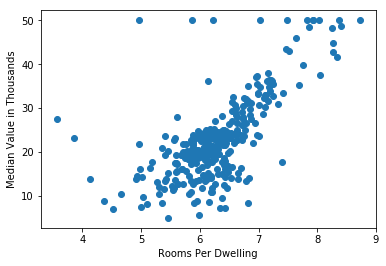

In [60]:
plt.scatter(df["rm"],df["medv"])
plt.xlabel("Rooms Per Dwelling")
plt.ylabel("Median Value in Thousands")
plt.show()
#important dependency found observe heat map also for it

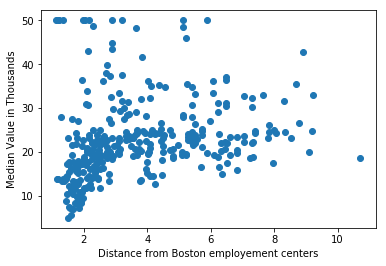

In [61]:
plt.scatter(df["dis"],df["medv"])
plt.xlabel("Distance from Boston employement centers")
plt.ylabel("Median Value in Thousands")
plt.show()
#some what linear

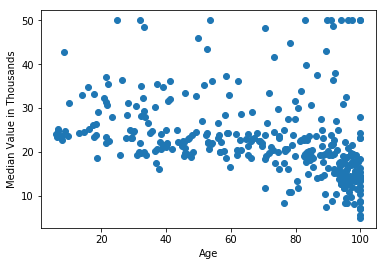

In [62]:
plt.scatter(df["age"],df["medv"])
plt.xlabel("Age")
plt.ylabel("Median Value in Thousands")
plt.show()

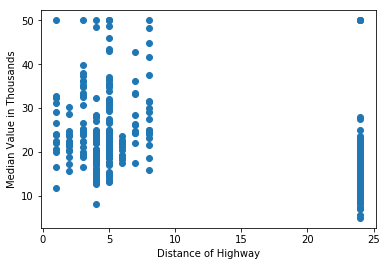

In [63]:
plt.scatter(df["rad"],df["medv"])
plt.xlabel("Distance of Highway")
plt.ylabel("Median Value in Thousands")
plt.show()

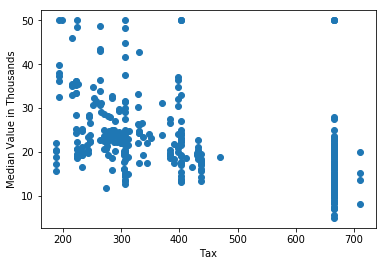

In [64]:
plt.scatter(df["tax"],df["medv"])
plt.xlabel("Tax")
plt.ylabel("Median Value in Thousands")
plt.show()

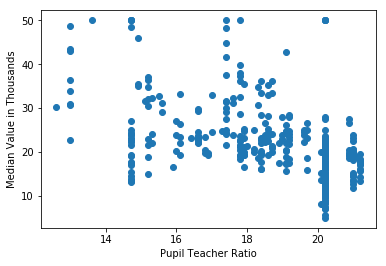

In [65]:
plt.scatter(df["ptratio"],df["medv"])
plt.xlabel("Pupil Teacher Ratio")
plt.ylabel("Median Value in Thousands")
plt.show()

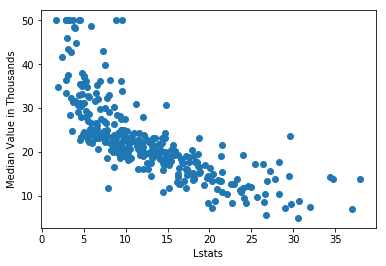

In [66]:
plt.scatter(df["lstat"],df["medv"])
plt.xlabel("Lstats")
plt.ylabel("Median Value in Thousands")
plt.show()
# Negative Corelation

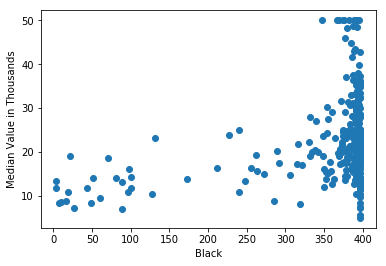

In [68]:
plt.scatter(df["black"],df["medv"])
plt.xlabel("Black")
plt.ylabel("Median Value in Thousands")
plt.show()

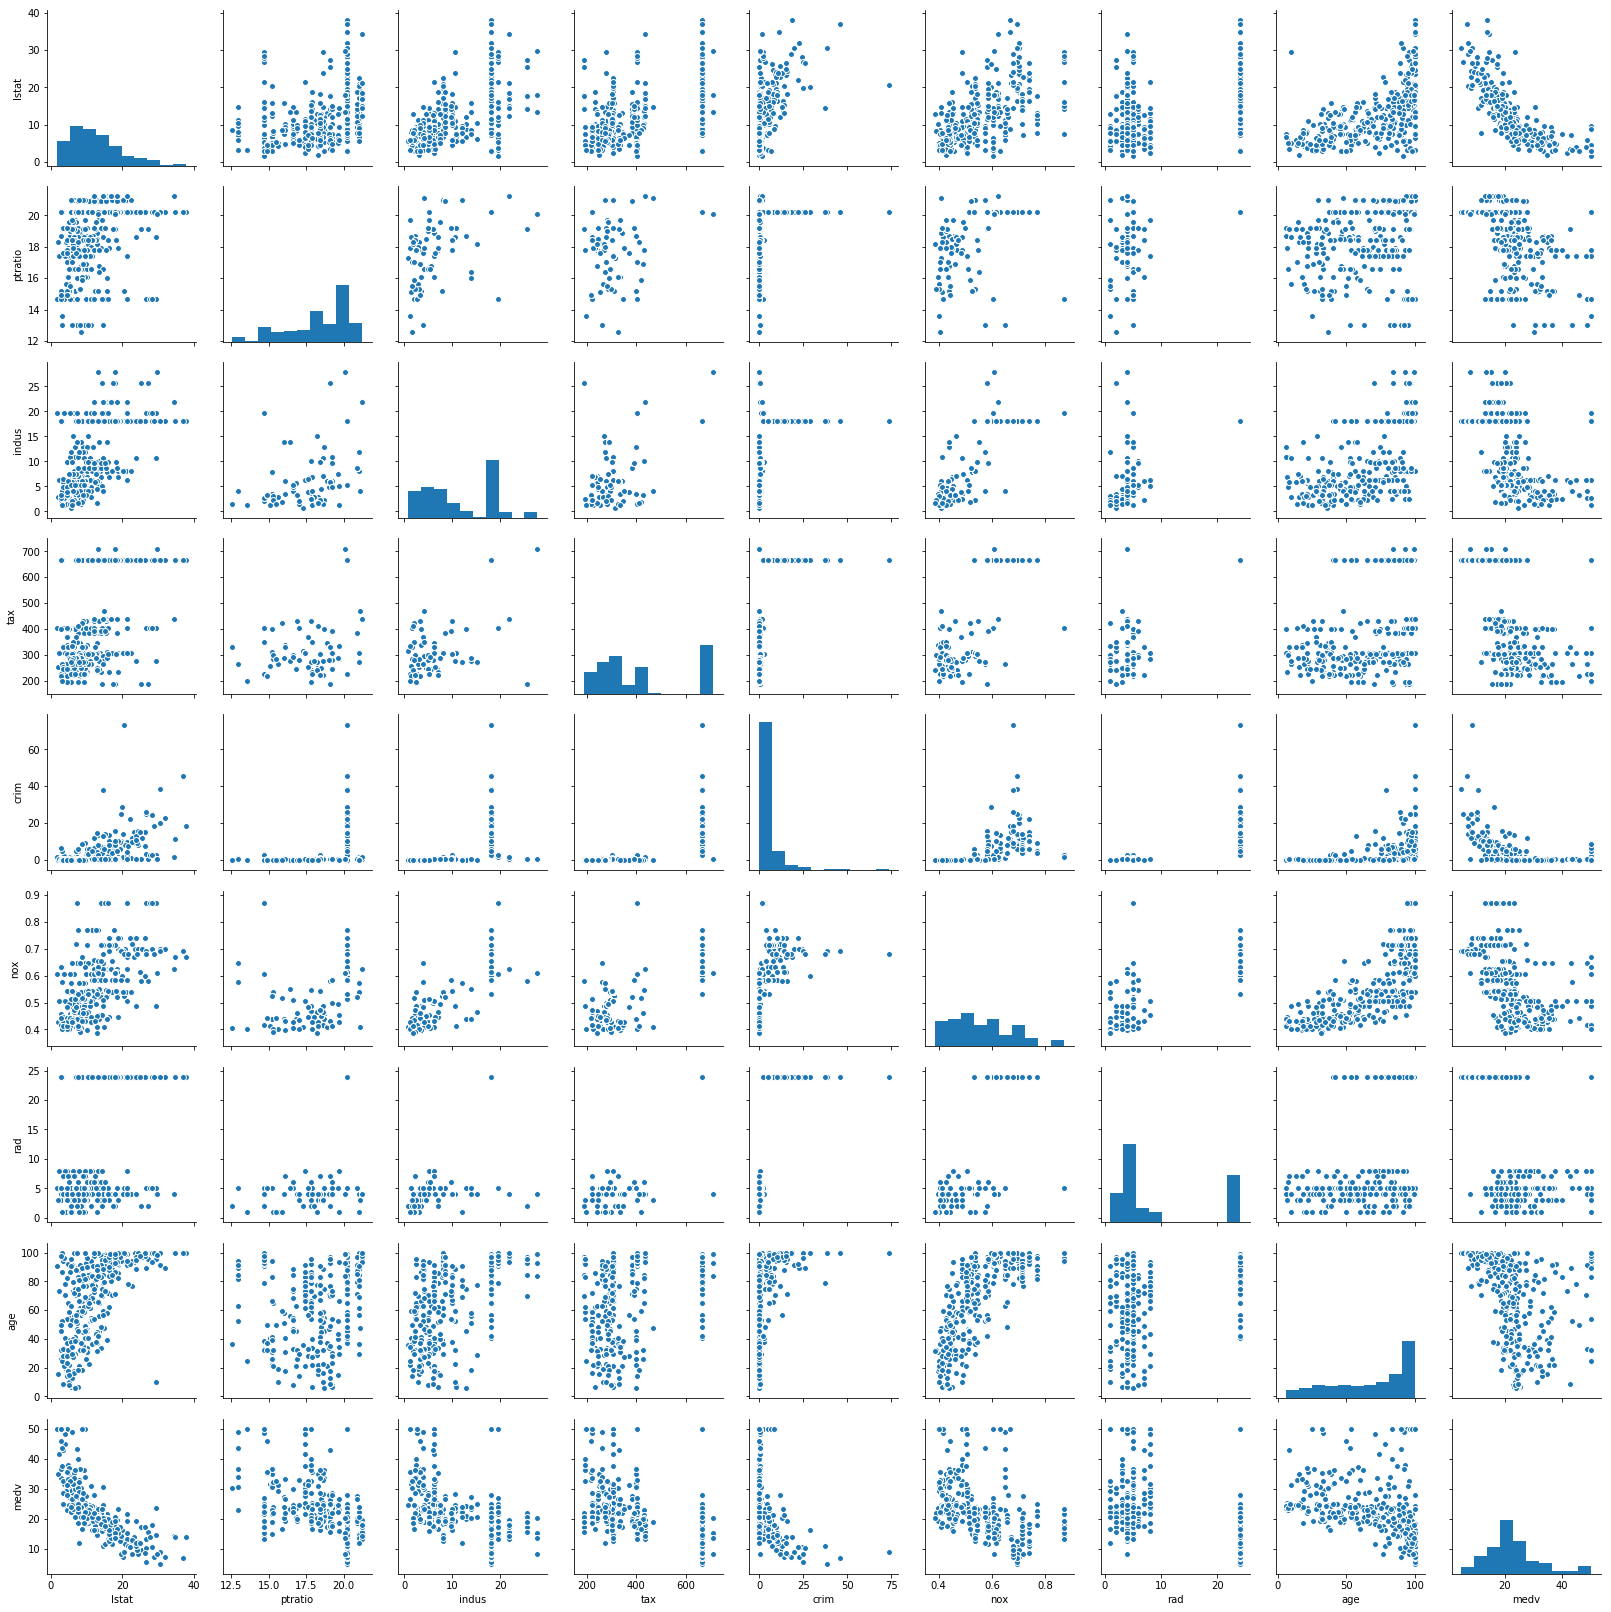

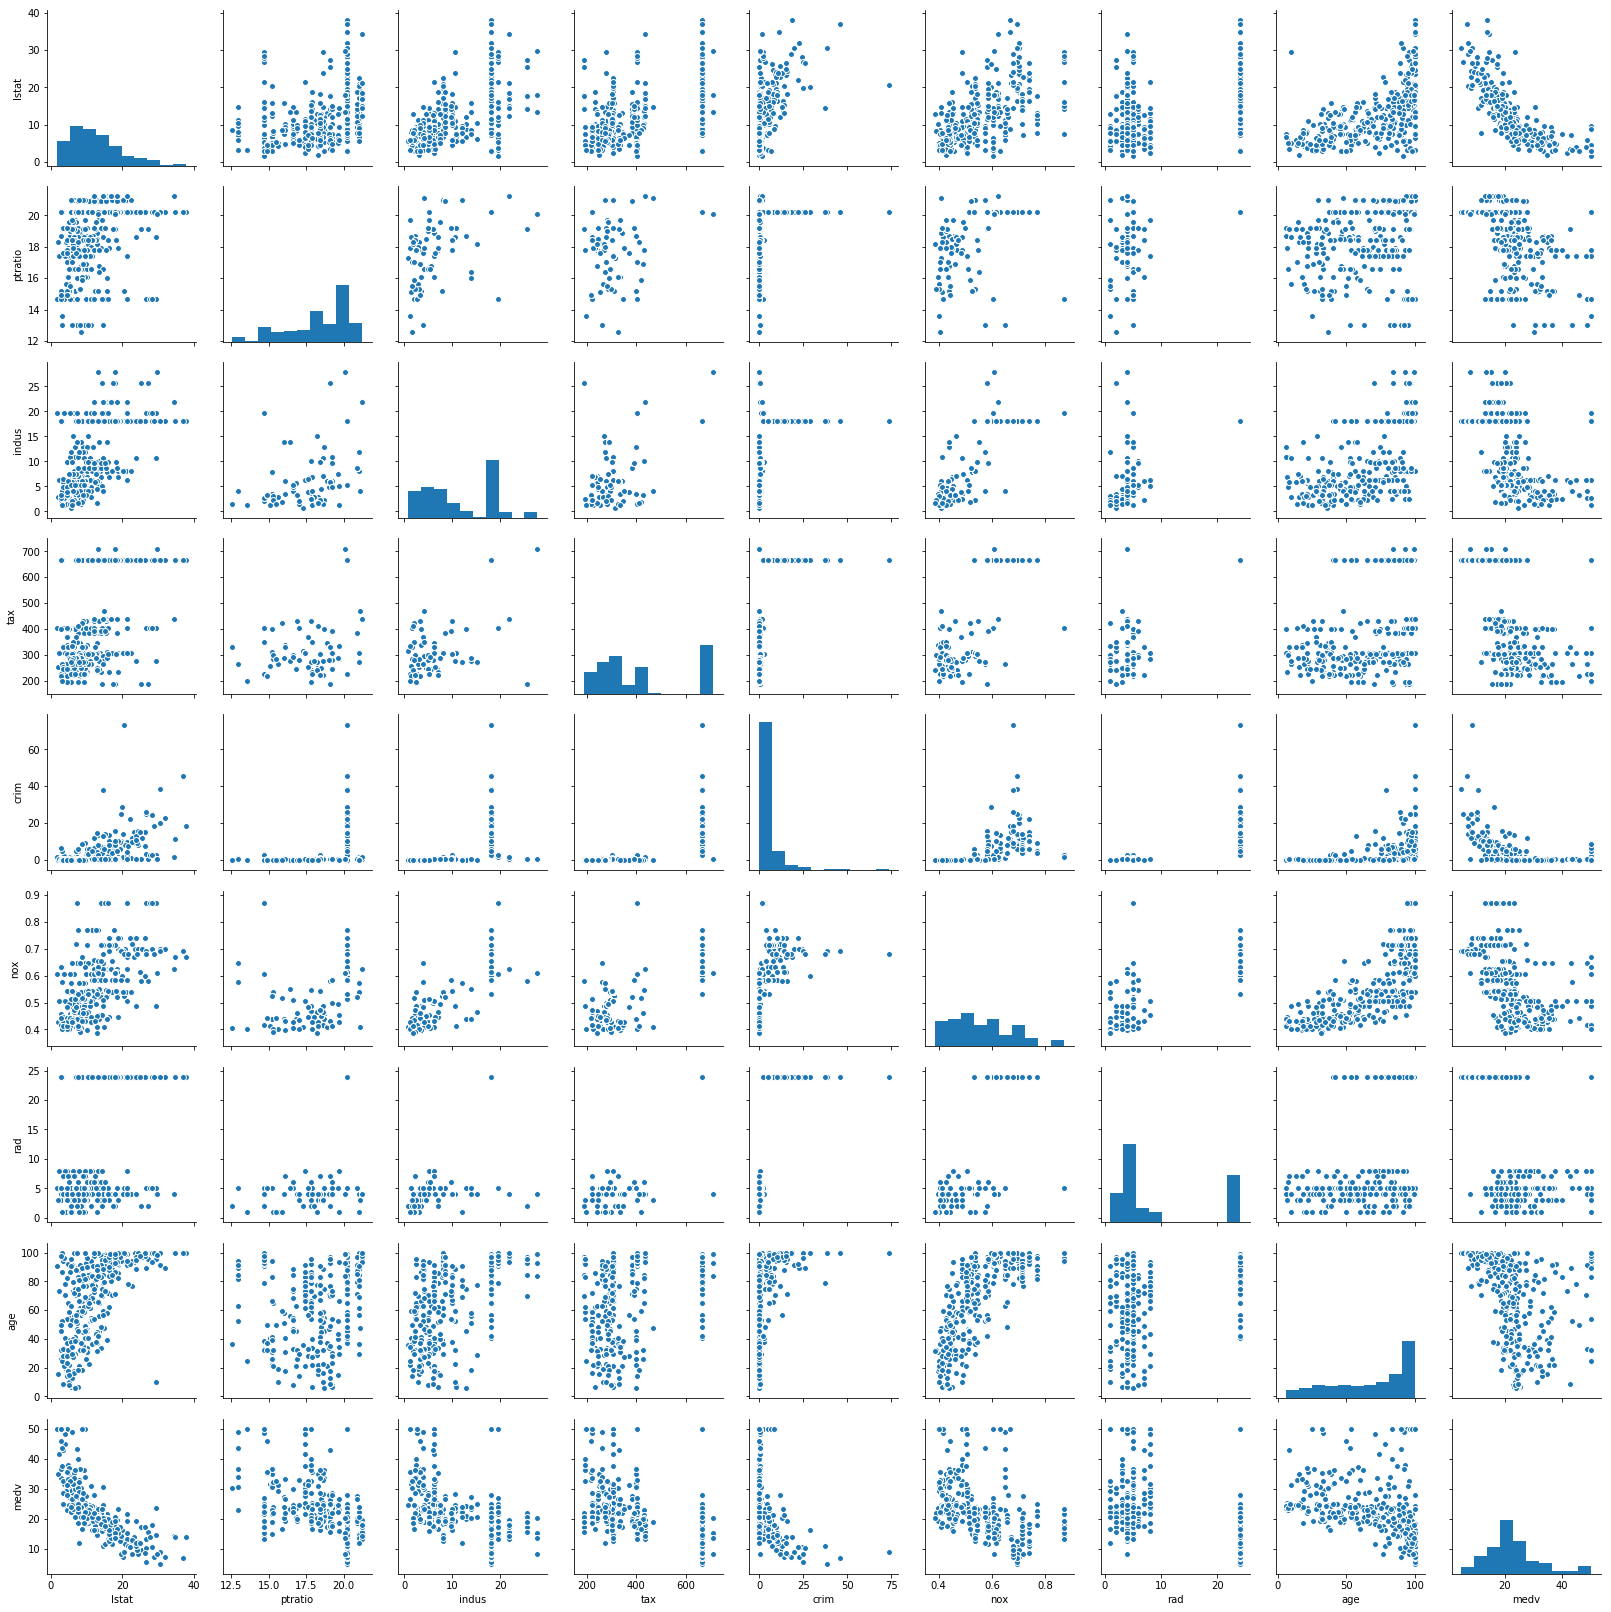

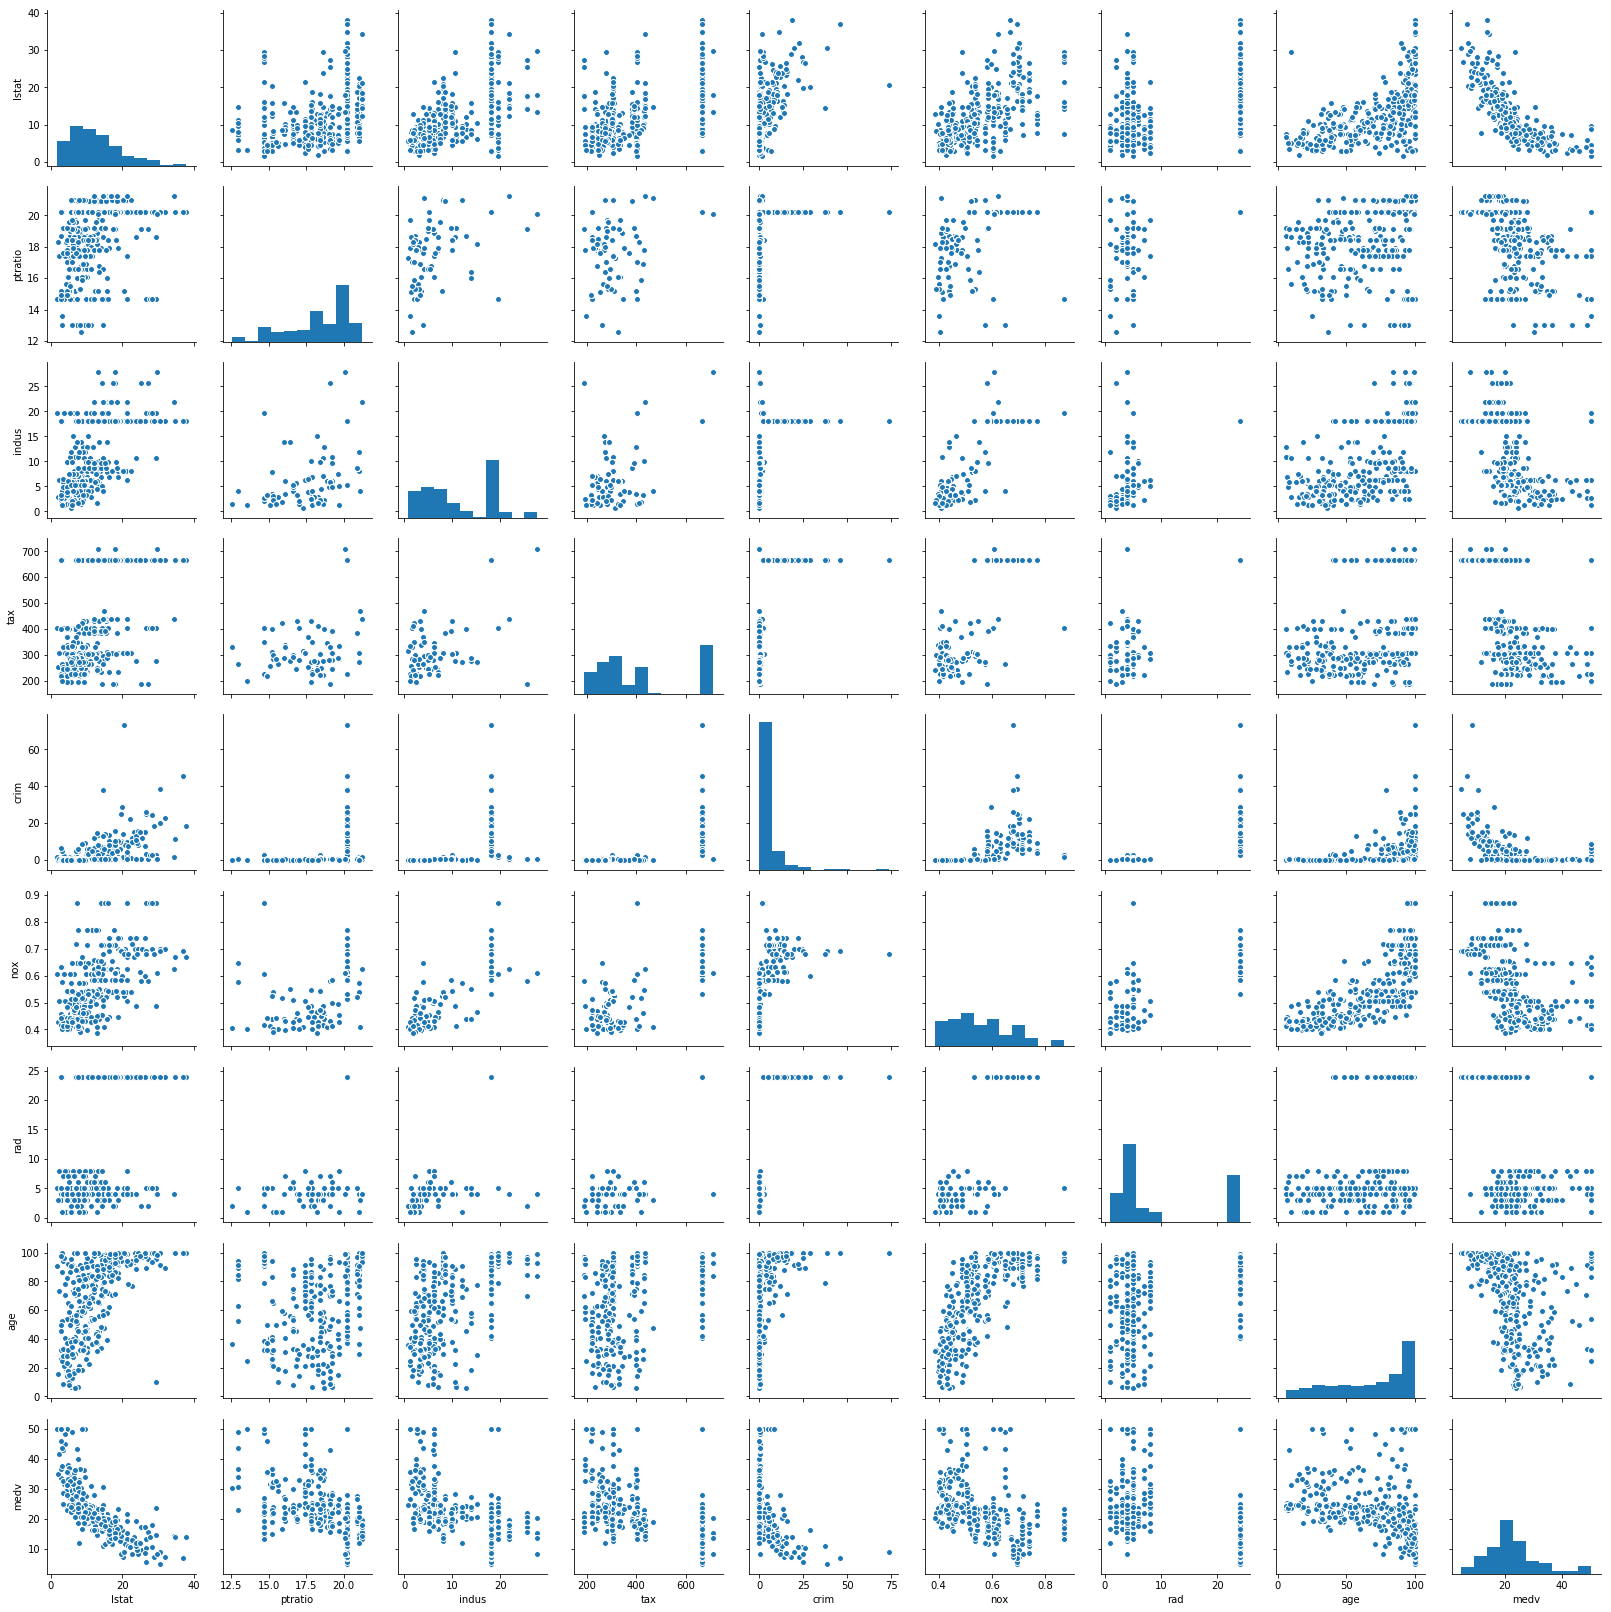

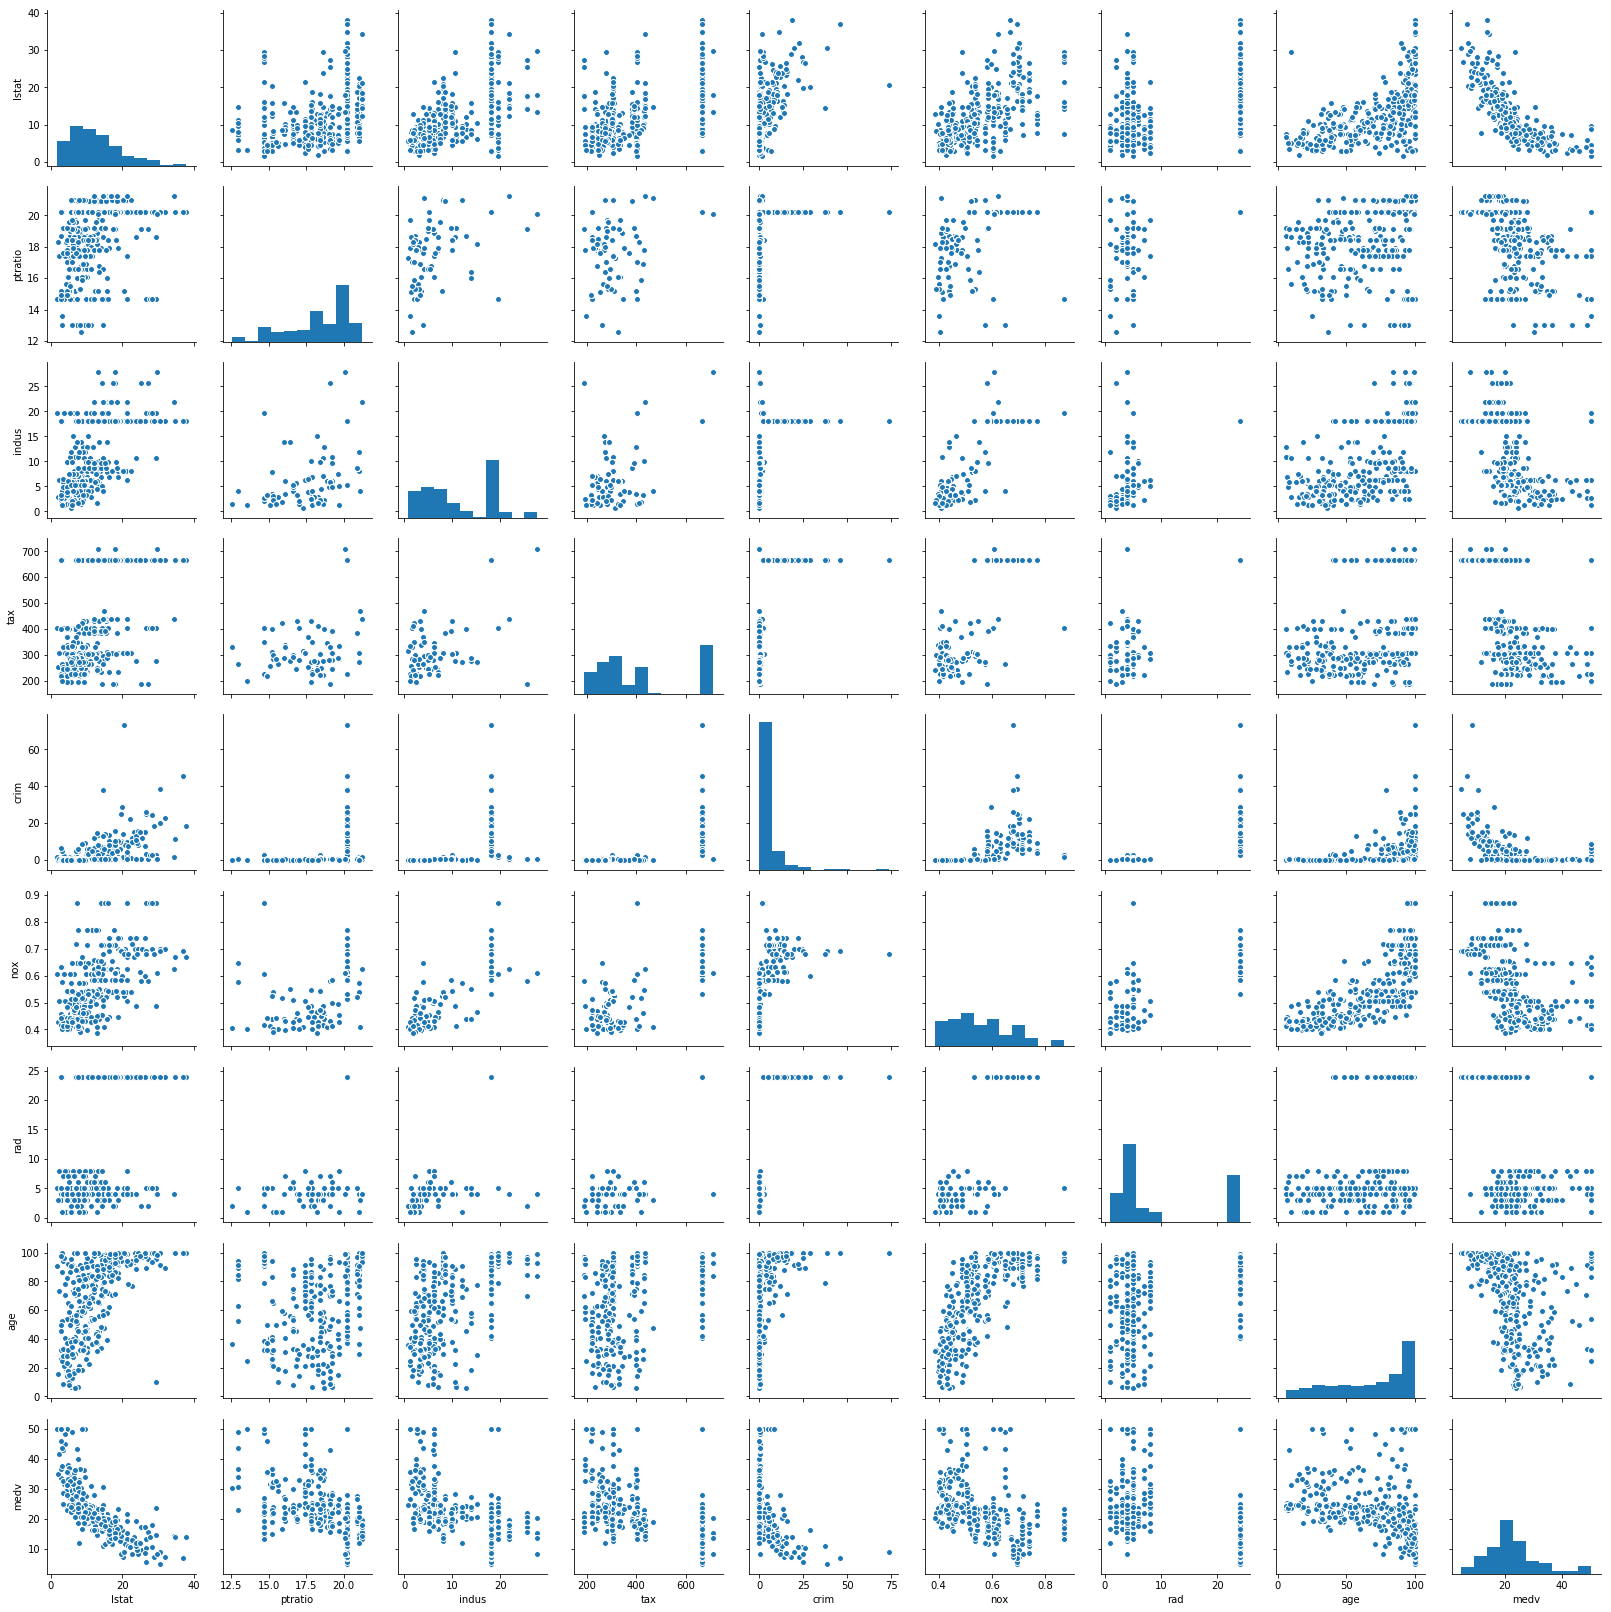

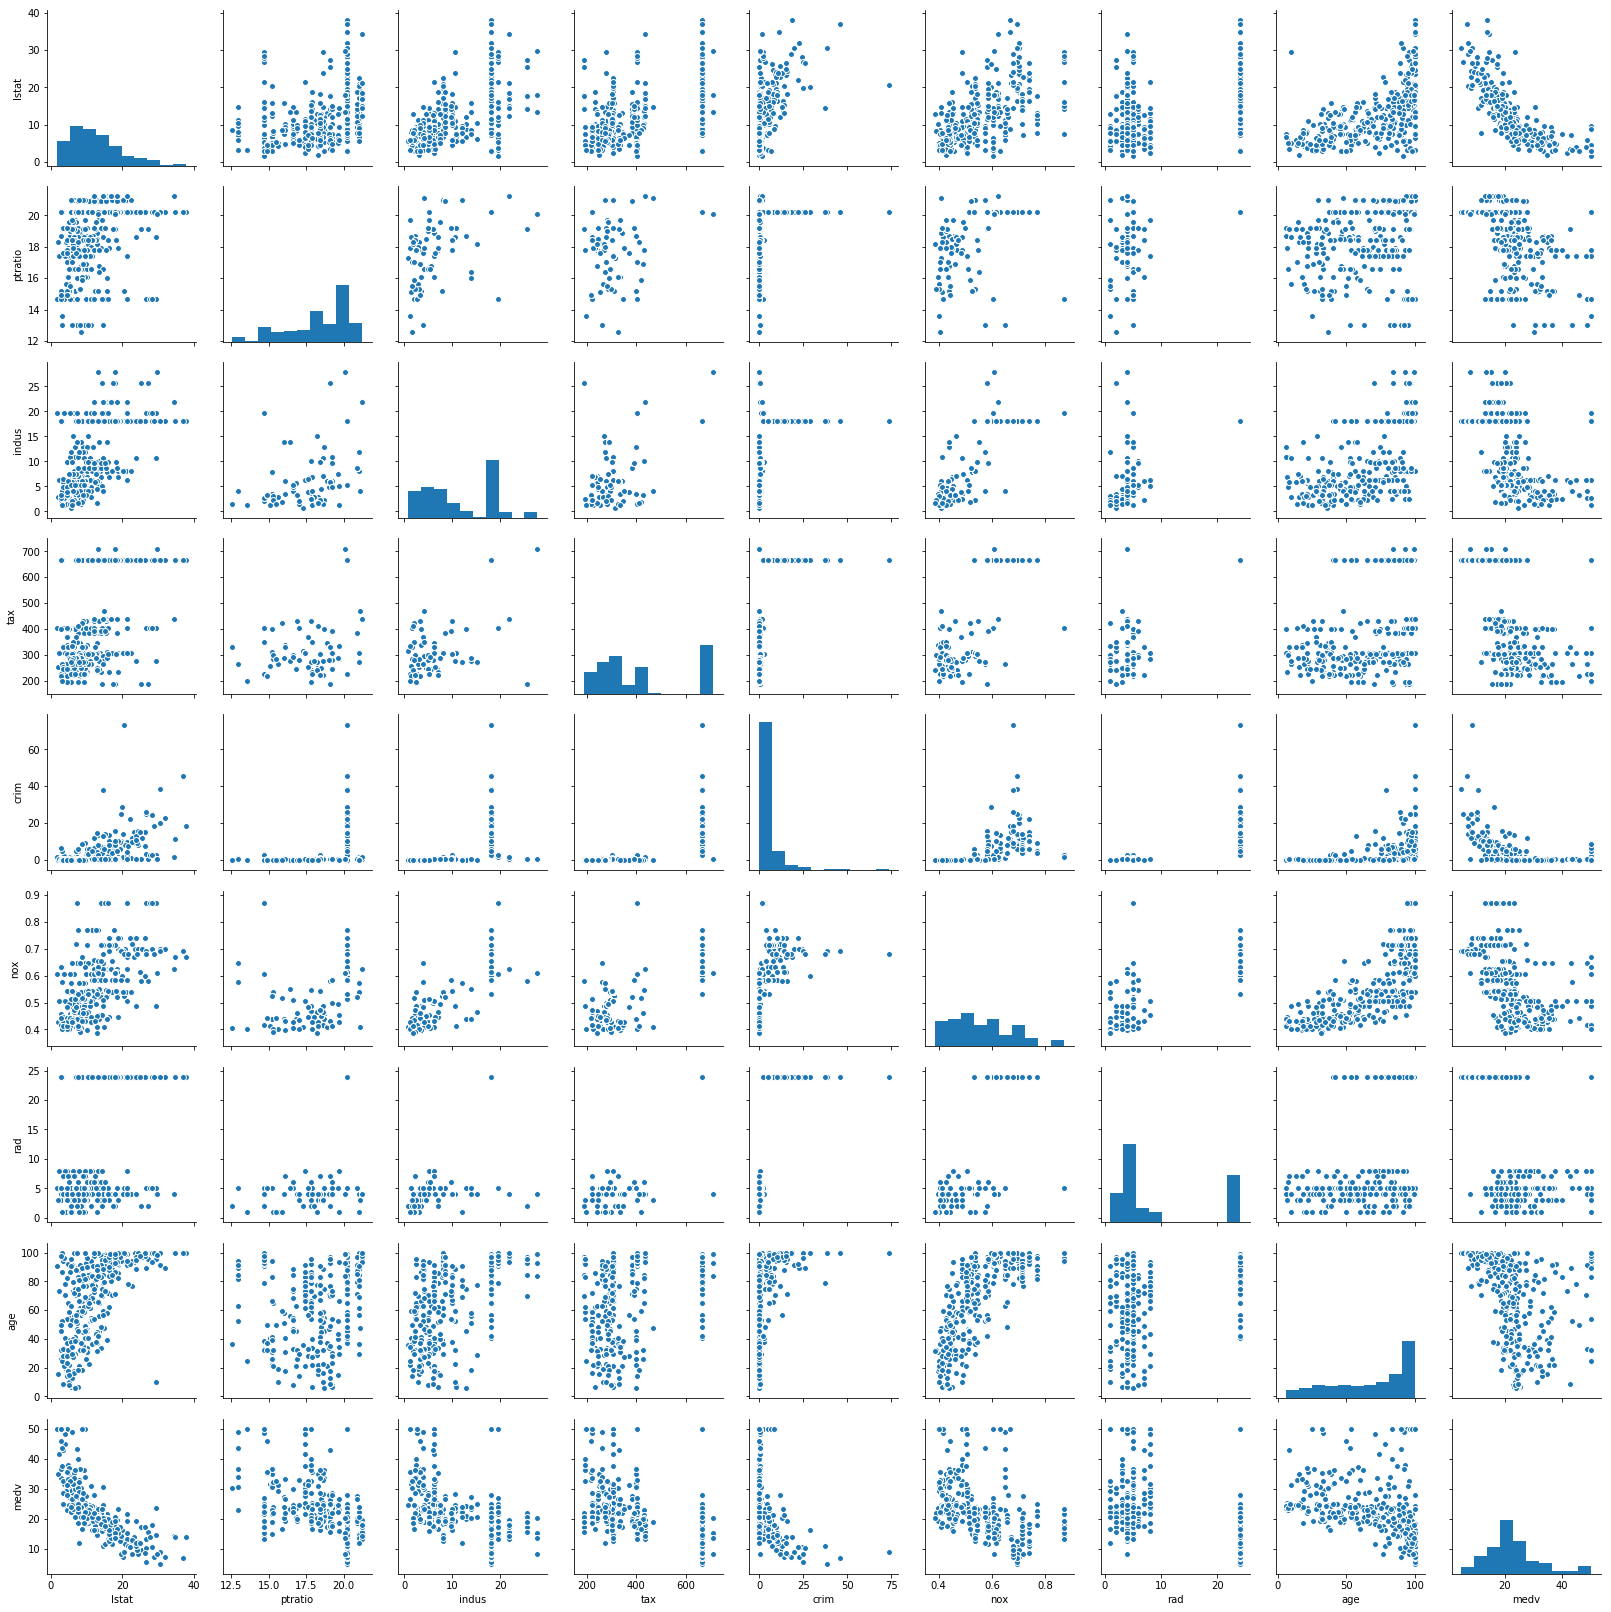

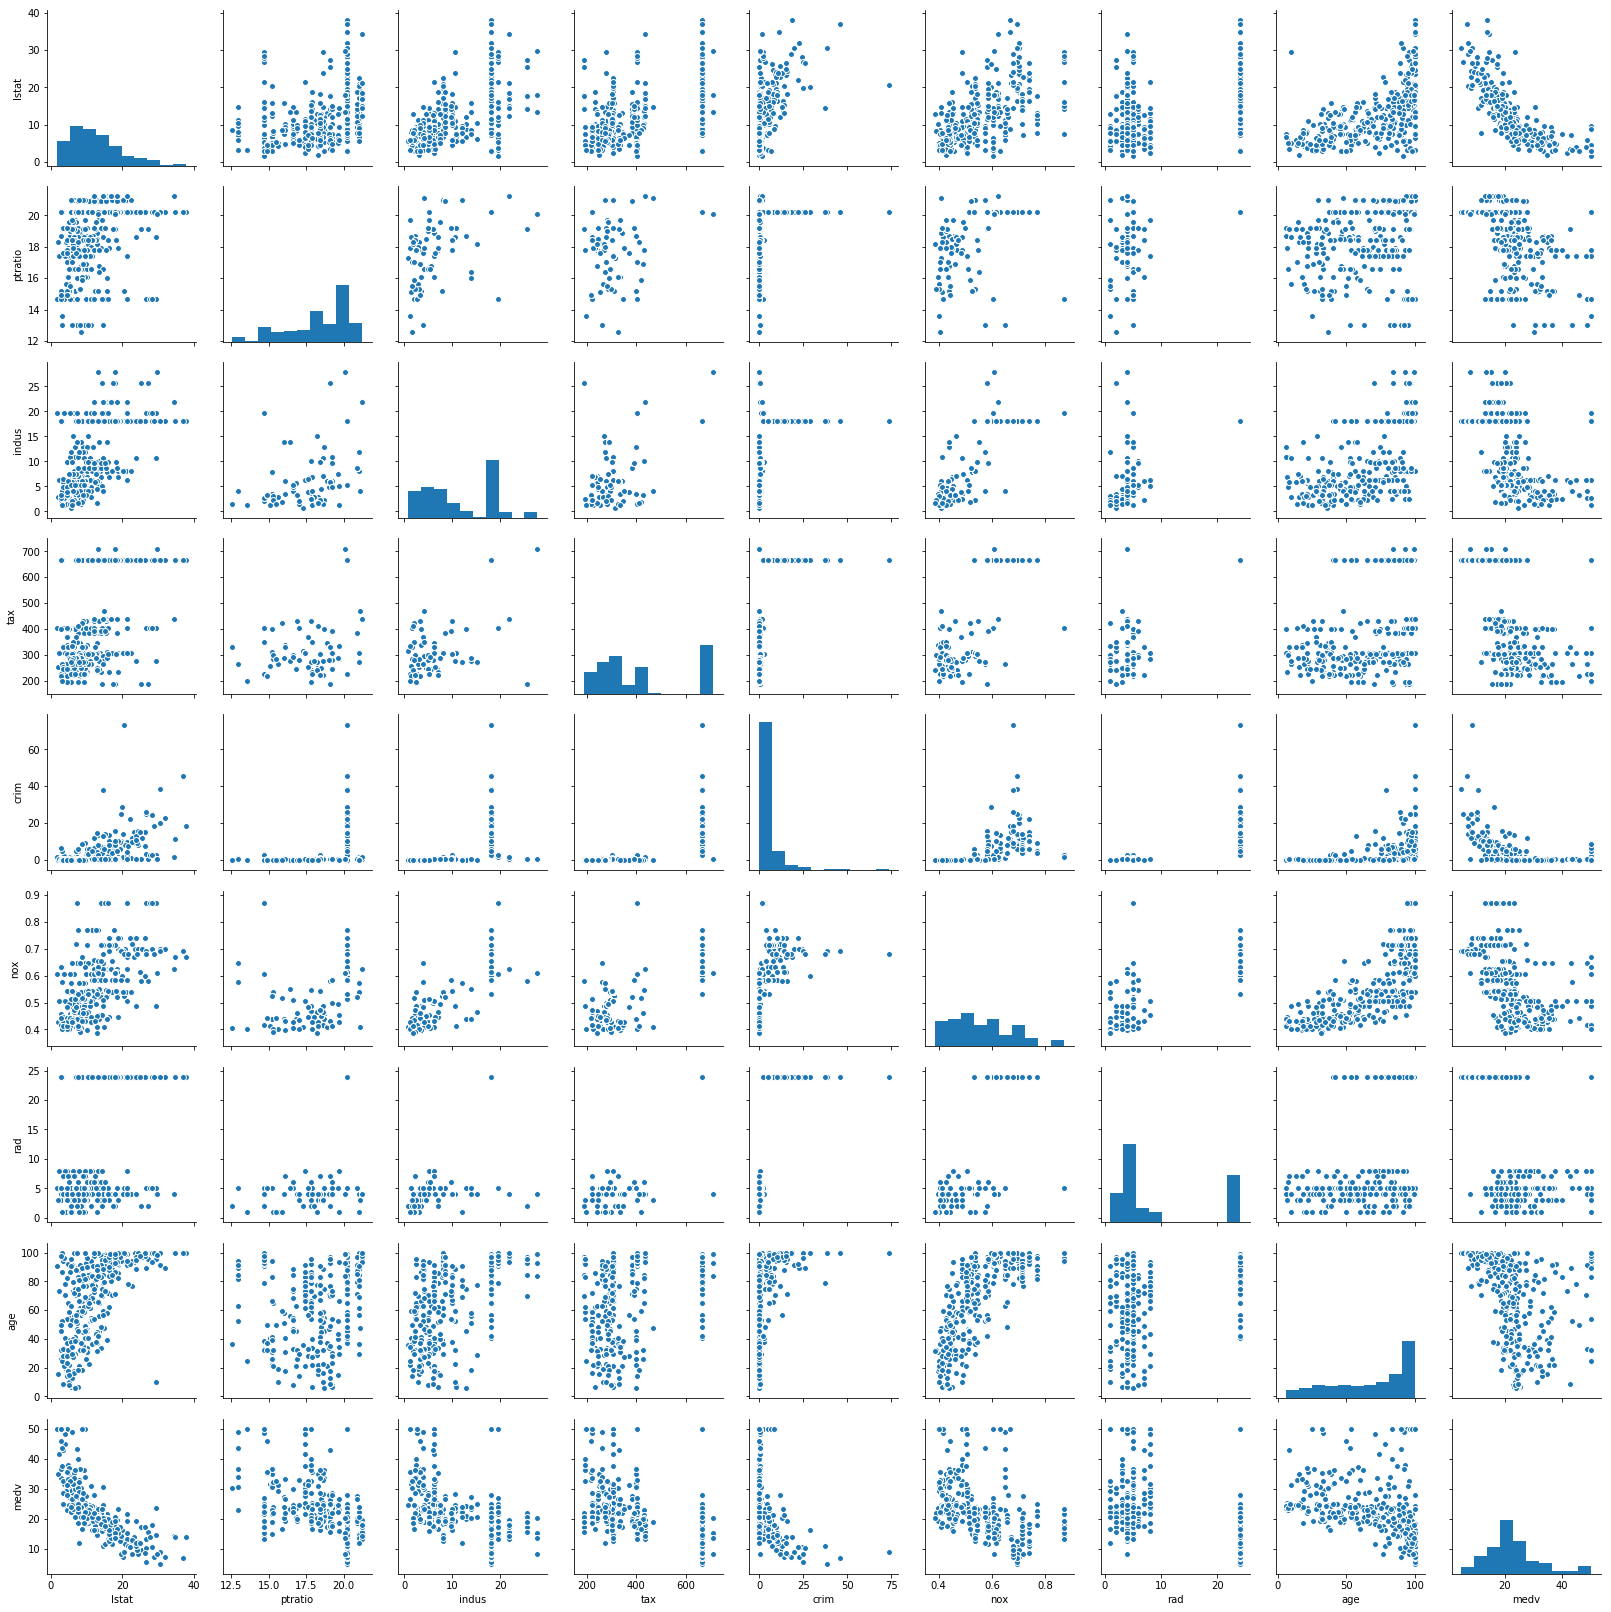

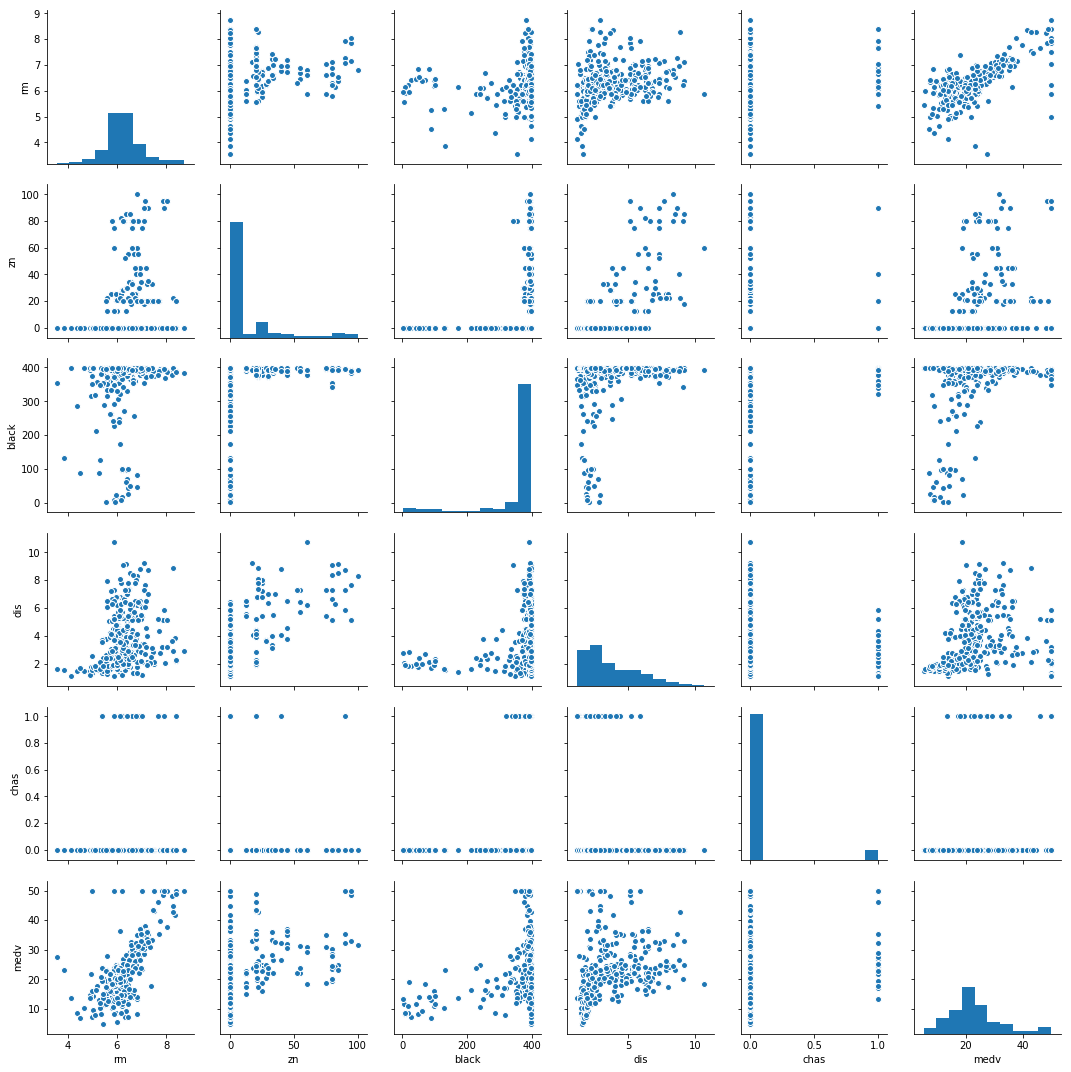

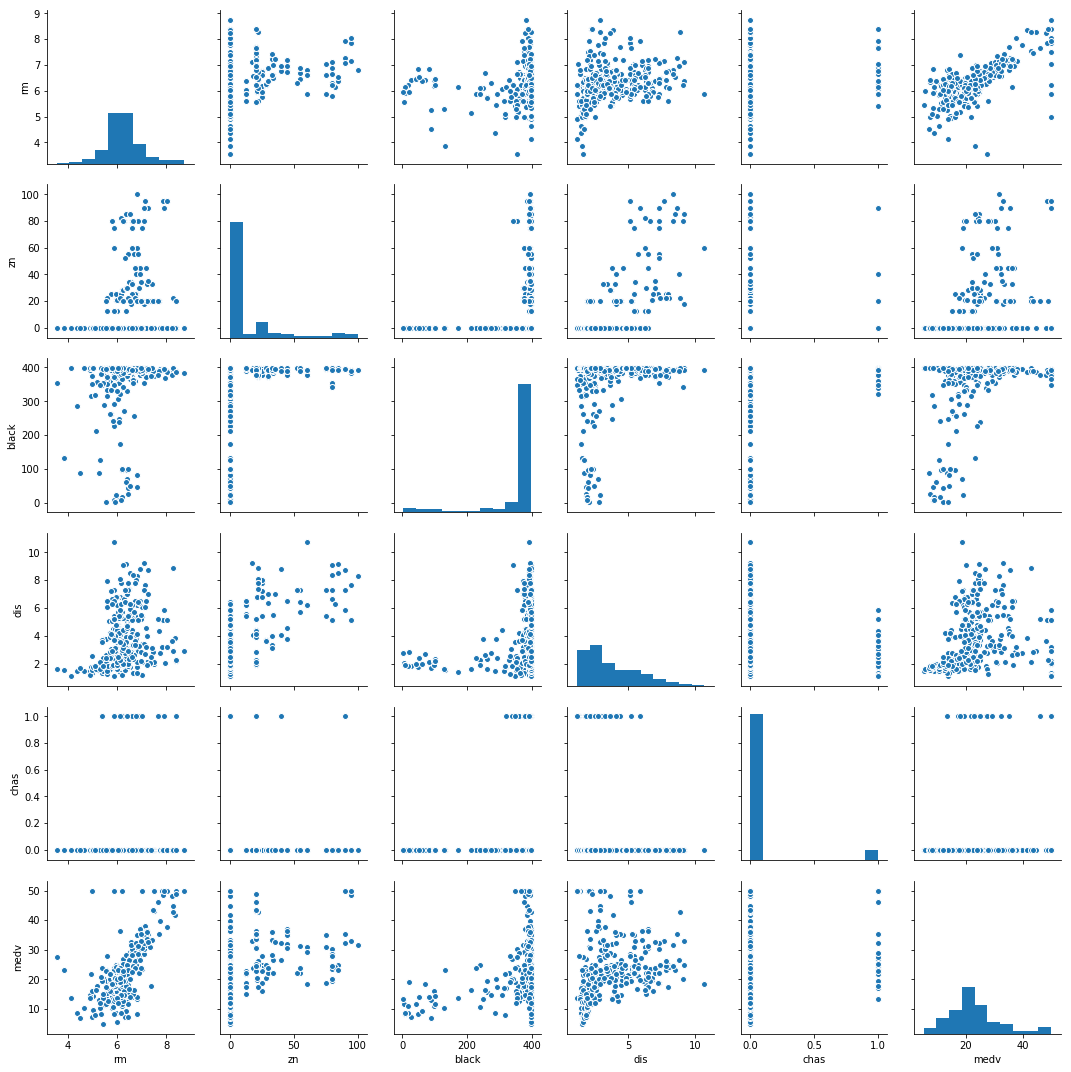

In [77]:
sns.pairplot(df, vars = ['rm', 'zn', 'black', 'dis', 'chas','medv'])
plt.show()
# Trying the models from above individual view

In [97]:
#lets prepare model now and build regression logic
# we will consider rm,dis,black,tax,ptratio from observation
# once performed with them got high metrics so consider using all metrics
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = df['medv']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [93]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
predictions = model.predict(X_test)

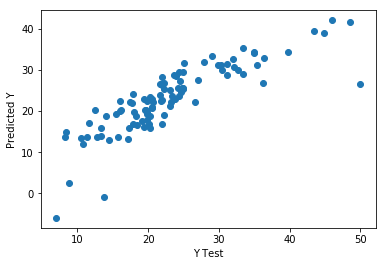

In [95]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [96]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.30571231419
MSE: 21.6044563724
RMSE: 4.64805942006


In [110]:
# testing with the test.csv
test = pd.read_csv("C:\\Users\\tusha\\OneDrive\\Desktop\\BostonHouse\\boston_test.csv")
test.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

In [135]:
predictors = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age','dis','rad','tax','ptratio','black','lstat']
predictions = model.predict(test[predictors])
k=test["ID"].tolist()
#k=np.array(k)
#print(predictions)
print(len(k),len(predictions))
df1={"Id":k,"medv":predictions}
df2= pd.DataFrame(df1,columns = ['Id', 'medv'])
#print(df2)

173 173


In [140]:
df2.to_csv('C:\\Users\\tusha\\OneDrive\\Desktop\\BostonHouse\\submission.csv')